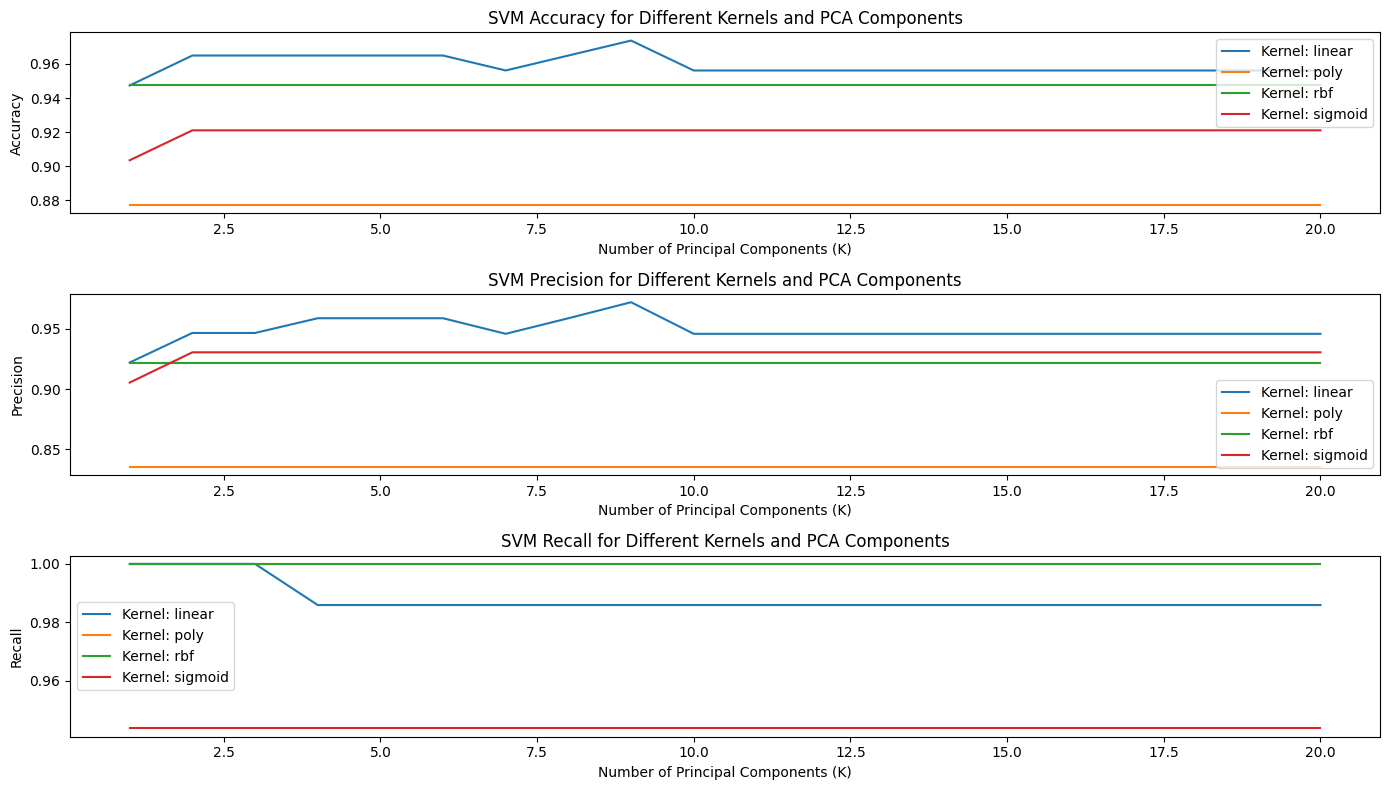

In [4]:
# problem 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

K_values = range(1, 21)
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']

accuracies = {kernel: [] for kernel in kernel_types}
precisions = {kernel: [] for kernel in kernel_types}
recalls = {kernel: [] for kernel in kernel_types}

for K in K_values:
    #pca
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # train and eval svm for kernel types
    for kernel in kernel_types:
        svm = SVC(kernel=kernel)
        svm.fit(X_train_pca, y_train)

        y_pred = svm.predict(X_test_pca)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)

        accuracies[kernel].append(acc)
        precisions[kernel].append(prec)
        recalls[kernel].append(rec)

plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
for kernel in kernel_types:
    plt.plot(K_values, accuracies[kernel], label=f'Kernel: {kernel}')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy for Different Kernels and PCA Components')
plt.legend()

plt.subplot(3, 1, 2)
for kernel in kernel_types:
    plt.plot(K_values, precisions[kernel], label=f'Kernel: {kernel}')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Precision')
plt.title('SVM Precision for Different Kernels and PCA Components')
plt.legend()

plt.subplot(3, 1, 3)
for kernel in kernel_types:
    plt.plot(K_values, recalls[kernel], label=f'Kernel: {kernel}')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Recall')
plt.title('SVM Recall for Different Kernels and PCA Components')
plt.legend()

plt.tight_layout()
plt.show()


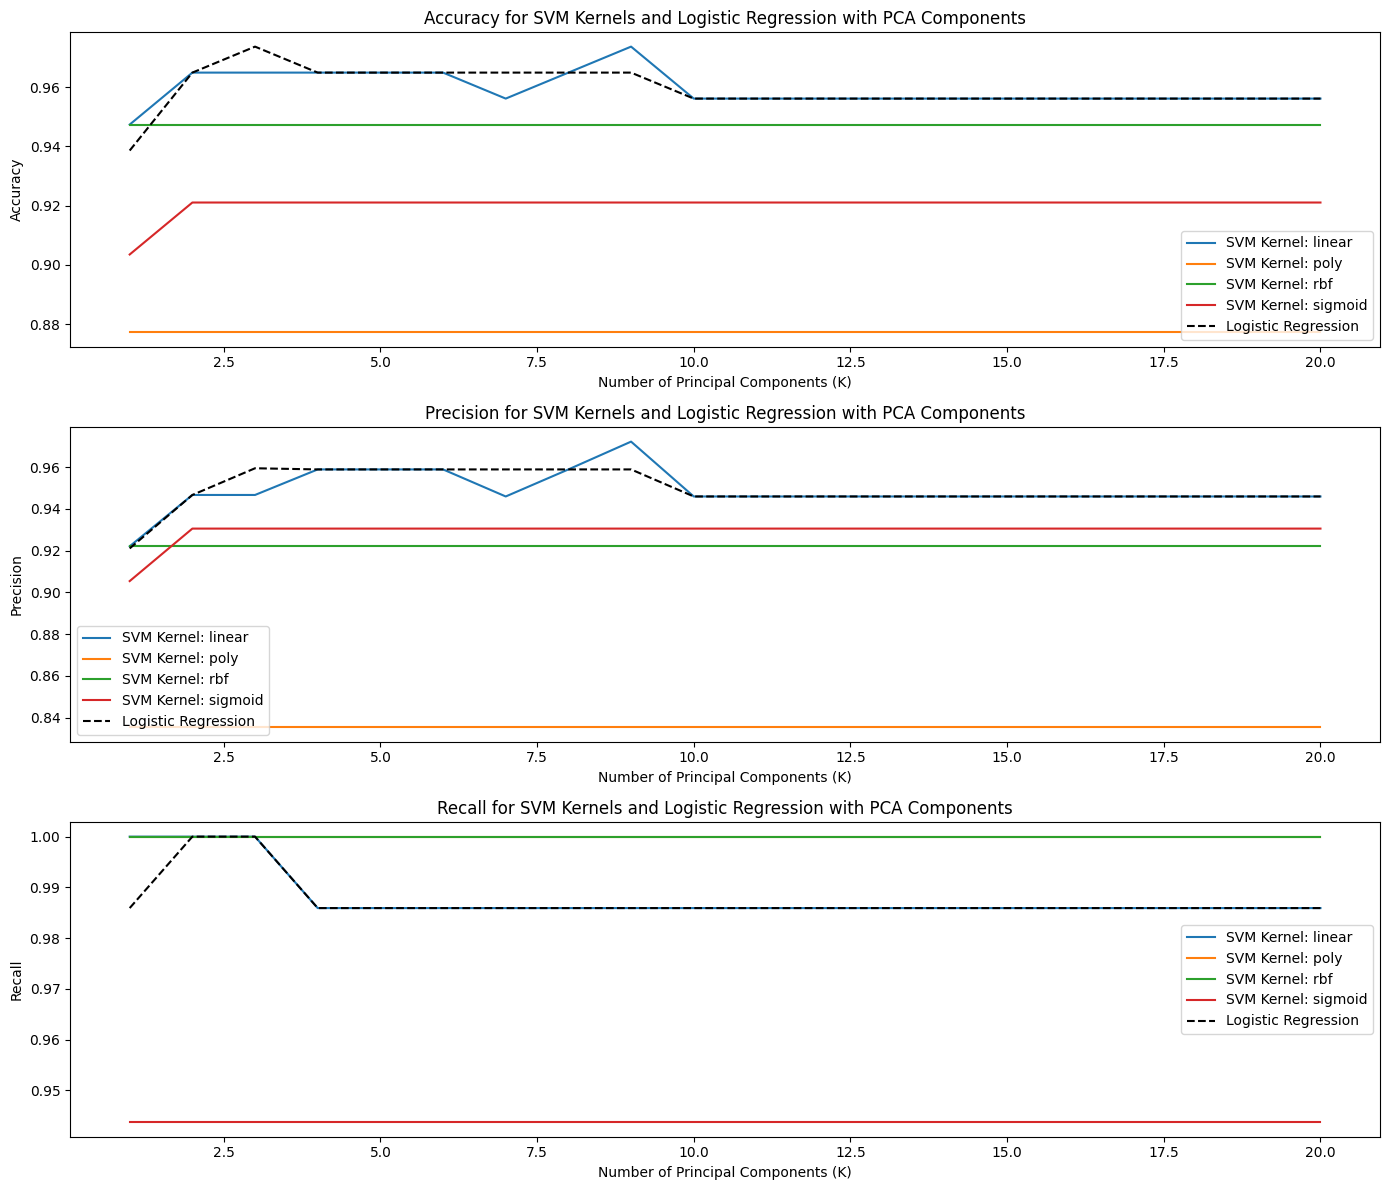

In [6]:
# problem 1 with log reg comparison
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

K_values = range(1, 21)
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']

accuracies = {kernel: [] for kernel in kernel_types}
precisions = {kernel: [] for kernel in kernel_types}
recalls = {kernel: [] for kernel in kernel_types}

log_reg_accuracies = []
log_reg_precisions = []
log_reg_recalls = []

for K in K_values:
    # PCA
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    for kernel in kernel_types:
        svm = SVC(kernel=kernel)
        svm.fit(X_train_pca, y_train)

        y_pred = svm.predict(X_test_pca)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)

        accuracies[kernel].append(acc)
        precisions[kernel].append(prec)
        recalls[kernel].append(rec)

    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train_pca, y_train)
    y_pred_log_reg = log_reg.predict(X_test_pca)

    log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
    log_reg_prec = precision_score(y_test, y_pred_log_reg)
    log_reg_rec = recall_score(y_test, y_pred_log_reg)

    log_reg_accuracies.append(log_reg_acc)
    log_reg_precisions.append(log_reg_prec)
    log_reg_recalls.append(log_reg_rec)

plt.figure(figsize=(14, 12))

plt.subplot(3, 1, 1)
for kernel in kernel_types:
    plt.plot(K_values, accuracies[kernel], label=f'SVM Kernel: {kernel}')
plt.plot(K_values, log_reg_accuracies, label='Logistic Regression', linestyle='--', color='black')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy for SVM Kernels and Logistic Regression with PCA Components')
plt.legend()

plt.subplot(3, 1, 2)
for kernel in kernel_types:
    plt.plot(K_values, precisions[kernel], label=f'SVM Kernel: {kernel}')
plt.plot(K_values, log_reg_precisions, label='Logistic Regression', linestyle='--', color='black')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Precision')
plt.title('Precision for SVM Kernels and Logistic Regression with PCA Components')
plt.legend()

plt.subplot(3, 1, 3)
for kernel in kernel_types:
    plt.plot(K_values, recalls[kernel], label=f'SVM Kernel: {kernel}')
plt.plot(K_values, log_reg_recalls, label='Logistic Regression', linestyle='--', color='black')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Recall')
plt.title('Recall for SVM Kernels and Logistic Regression with PCA Components')
plt.legend()

plt.tight_layout()
plt.show()

# Kernel Performance Discussion:
# The linear and rbf kernels typically perform well across different numbers of PCA components,
# showing stable and high accuracy and precision. The polynomial and sigmoid kernels tend to underperform,
# possibly due to their complexity or unsuitability for this dataset.
# Logistic regression shows competitive results with the linear SVM, highlighting that simpler models
# can sometimes perform comparably well on linearly separable data.


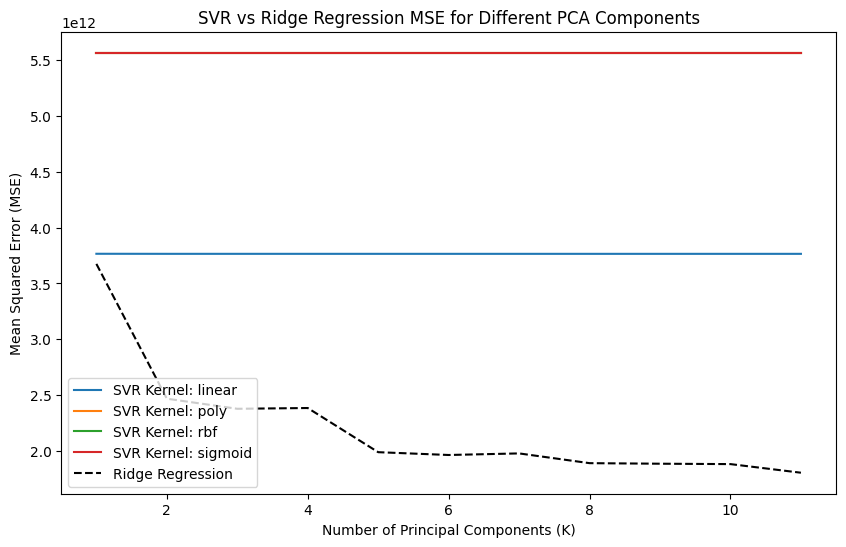

In [11]:
# problem 2 iteration 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
data = pd.read_csv(url)

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
            'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = data[features].copy()
y = data['price']

# category values
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X.loc[:, column] = le.fit_transform(X[column])
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

K_values = range(1, len(features) + 1)
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']

mse_scores = {kernel: [] for kernel in kernel_types}

for K in K_values:
    # PCA
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    for kernel in kernel_types:
        svr = SVR(kernel=kernel)
        svr.fit(X_train_pca, y_train)

        y_pred = svr.predict(X_test_pca)

        mse = mean_squared_error(y_test, y_pred)

        mse_scores[kernel].append(mse)

ridge_mse_scores = []

for K in K_values:
    # PCA
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    ridge = Ridge()
    ridge.fit(X_train_pca, y_train)
    y_pred = ridge.predict(X_test_pca)

    mse = mean_squared_error(y_test, y_pred)
    ridge_mse_scores.append(mse)

plt.figure(figsize=(10, 6))
for kernel in kernel_types:
    plt.plot(K_values, mse_scores[kernel], label=f'SVR Kernel: {kernel}')
plt.plot(K_values, ridge_mse_scores, label='Ridge Regression', linestyle='--', color='black')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('SVR vs Ridge Regression MSE for Different PCA Components')
plt.legend()
plt.show()


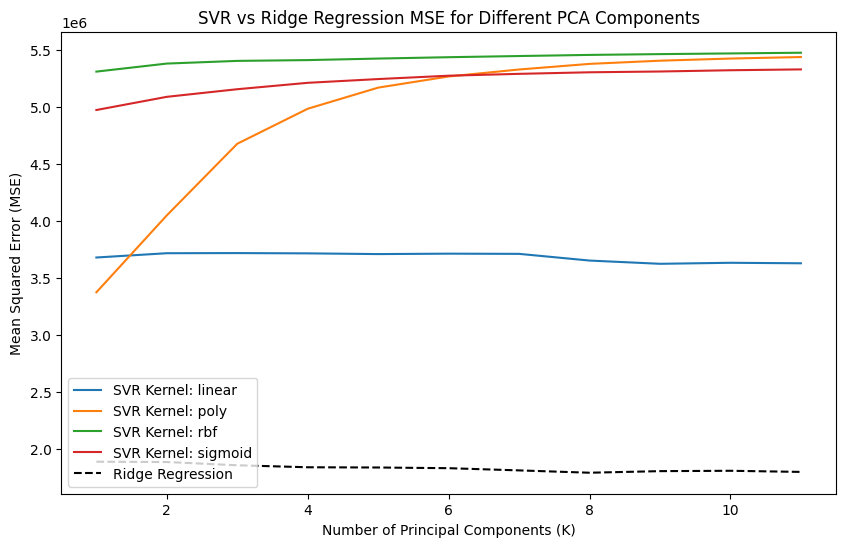

In [1]:
#problem2 with scaling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder, StandardScaler

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
data = pd.read_csv(url)

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
            'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = data[features].copy()
y = data['price'] / 1000

label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X.loc[:, column] = le.fit_transform(X[column])
    label_encoders[column] = le

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

K_values = range(1, len(features) + 1)
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']

mse_scores = {kernel: [] for kernel in kernel_types}

for K in K_values:

    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    for kernel in kernel_types:
        svr = SVR(kernel=kernel)
        svr.fit(X_train_pca, y_train)

        y_pred = svr.predict(X_test_pca)

        mse = mean_squared_error(y_test, y_pred)

        mse_scores[kernel].append(mse)

ridge_mse_scores = []

for K in K_values:

    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    ridge = Ridge()
    ridge.fit(X_train_pca, y_train)
    y_pred = ridge.predict(X_test_pca)

    mse = mean_squared_error(y_test, y_pred)
    ridge_mse_scores.append(mse)

plt.figure(figsize=(10, 6))
for kernel in kernel_types:
    plt.plot(K_values, mse_scores[kernel], label=f'SVR Kernel: {kernel}')
plt.plot(K_values, ridge_mse_scores, label='Ridge Regression', linestyle='--', color='black')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('SVR vs Ridge Regression MSE for Different PCA Components')
plt.legend()
plt.show()


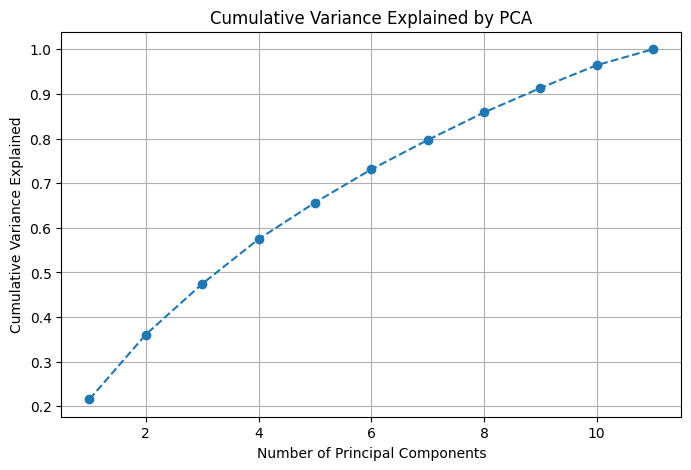

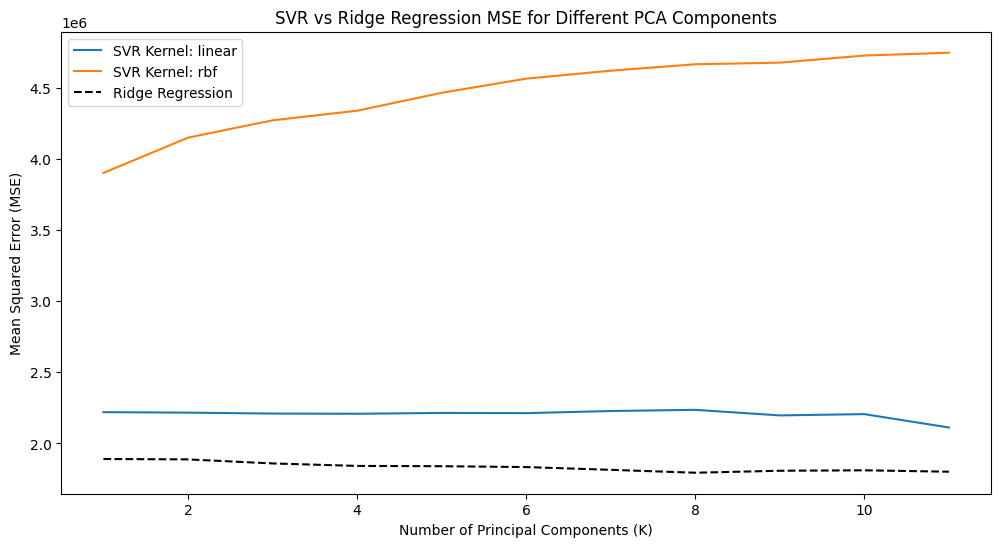

In [5]:
# IDK for problem2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder, StandardScaler

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
data = pd.read_csv(url)

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
            'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = data[features].copy()
y = data['price'] / 1000

label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X.loc[:, column] = le.fit_transform(X[column])
    label_encoders[column] = le

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA()
pca.fit(X_train)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(features) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by PCA')
plt.grid(True)
plt.show()

K_values = range(1, len(features) + 1)
kernels = ['linear', 'rbf']

mse_scores = {kernel: [] for kernel in kernels}

param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1], 'epsilon': [0.1, 0.2, 0.5]}

for K in K_values:

    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    for kernel in kernels:
        svr = SVR(kernel=kernel)
        grid_search = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5)
        grid_search.fit(X_train_pca, y_train)

        best_svr = grid_search.best_estimator_
        y_pred = best_svr.predict(X_test_pca)

        mse = mean_squared_error(y_test, y_pred)

        mse_scores[kernel].append(mse)

ridge_mse_scores = []
for K in K_values:
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    ridge = Ridge()
    ridge.fit(X_train_pca, y_train)
    y_pred = ridge.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    ridge_mse_scores.append(mse)

plt.figure(figsize=(12, 6))
for kernel in kernels:
    plt.plot(K_values, mse_scores[kernel], label=f'SVR Kernel: {kernel}')
plt.plot(K_values, ridge_mse_scores, label='Ridge Regression', linestyle='--', color='black')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('SVR vs Ridge Regression MSE for Different PCA Components')
plt.legend()
plt.show()